In [3]:
# All imports


# General
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For CNN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For handling Images
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

# Tensorflow
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.__version__

'2.1.0'

In [1]:
#unzipping files

import zipfile
with zipfile.ZipFile('./Data/face_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [13]:
df = pd.read_csv("Data/train_data.csv")

In [14]:
df.head()

,filename,person_id,series,tilt,pan
0,face_790.jpg,5,1,-15,30
1,face_2445.jpg,5,1,0,-75
2,face_2266.jpg,5,2,-15,-60
3,face_2713.jpg,5,2,0,-90
4,face_2016.jpg,5,2,15,-75


In [22]:
df.shape

(2325, 3)

In [15]:
# renaming column

df = df.rename(columns={'filename': 'filepath'})

In [16]:
# adding path 

df.filepath = 'Data/face_data/'+ df.filepath

In [17]:
df.head()

,filepath,person_id,series,tilt,pan
0,Data/face_data/face_790.jpg,5,1,-15,30
1,Data/face_data/face_2445.jpg,5,1,0,-75
2,Data/face_data/face_2266.jpg,5,2,-15,-60
3,Data/face_data/face_2713.jpg,5,2,0,-90
4,Data/face_data/face_2016.jpg,5,2,15,-75


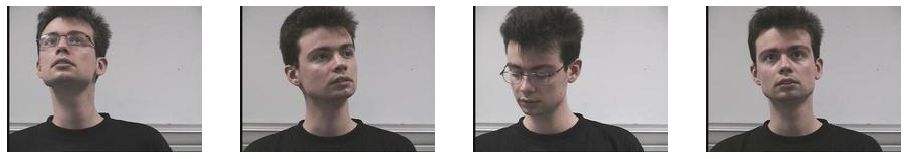

In [18]:
# displaying random images

r_inx = np.random.choice(100, 4)
rand_data = df.loc[r_inx,'filepath']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [20]:
# removing unnessary columns

df.drop(['person_id', 'series'], axis=1, inplace=True)

In [21]:
df

,filepath,tilt,pan
0,Data/face_data/face_790.jpg,-15,30
1,Data/face_data/face_2445.jpg,0,-75
2,Data/face_data/face_2266.jpg,-15,-60
3,Data/face_data/face_2713.jpg,0,-90
4,Data/face_data/face_2016.jpg,15,-75
...,...,...,...
2320,Data/face_data/face_1977.jpg,15,90
2321,Data/face_data/face_701.jpg,-15,90
2322,Data/face_data/face_1343.jpg,15,-30
2323,Data/face_data/face_851.jpg,-60,15
